In [118]:
import pandas as pd
import scipy.stats as stats

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('classic')

import statsmodels.api as sm

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
from sklearn.feature_selection import f_regression


In [108]:
telco_df = pd.read_csv('telco_2year.csv')
telco_df = telco_df.convert_objects(convert_numeric=True)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [200]:
# How many rows are in your dataframe?

telco_df.shape[0]

1695

In [201]:
# What is the data type of the field containing the customer ids?

telco_df['customer_id'].dtypes

dtype('O')

In [5]:
# Print to the notebook the last 10 rows of your dataframe.

telco_df.tail(10)


,customer_id,tenure,monthly_charges,total_charges
1685,9945-PSVIP,25,18.70,383.65
1686,9950-MTGYX,28,20.30,487.95
1687,9953-ZMKSM,63,25.25,1559.30
1688,9958-MEKUC,72,103.95,7517.70
1689,9959-WOFKT,71,106.70,7382.25
1690,9964-WBQDJ,71,24.40,1725.40
1691,9972-EWRJS,67,19.25,1372.90
1692,9975-GPKZU,46,19.75,856.50
1693,9993-LHIEB,67,67.85,4627.65
1694,9995-HOTOH,63,59.00,3707.60


In [6]:
# What is the inner quartile range of tenure? monthly charges? total charges?

t1 = telco_df.convert_objects(convert_numeric=True).drop(columns=['customer_id'])
t1_desc = t1.describe()
IQR = t1_desc.iloc[6] - t1_desc.iloc[4]
IQR

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


tenure               23.000
monthly_charges      66.425
total_charges      4721.050
dtype: float64

In [204]:
from scipy.stats import iqr

iqr(telco_df.tenure)

23.0

In [7]:
# How many missing values are in each variable?

telco_df.isnull().sum()

customer_id         0
tenure              0
monthly_charges     0
total_charges      10
dtype: int64

In [8]:
# Fill any missing values with 0.

telco_df = telco_df.fillna(0)

telco_df.isnull().sum()



customer_id        0
tenure             0
monthly_charges    0
total_charges      0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1fa9abe0>]],
      dtype=object)

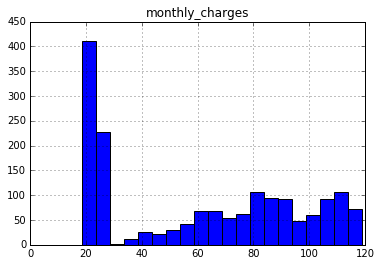

In [9]:
# Show the ditribution of monthly charges through a histogram

telco_df.hist(column= 'monthly_charges', bins=20)

In [10]:
# Create a new dataframe that contains tenure, monthly charges, and total charges, but not the customer id.

telco_df_noID = telco_df.drop(columns='customer_id')
telco_df_noID.head()



,tenure,monthly_charges,total_charges
0,71,109.70,7904.25
1,63,84.65,5377.80
2,65,90.45,5957.90
3,54,45.20,2460.55
4,72,116.80,8456.75


Text(0.5, 1.0, 'Total charges')

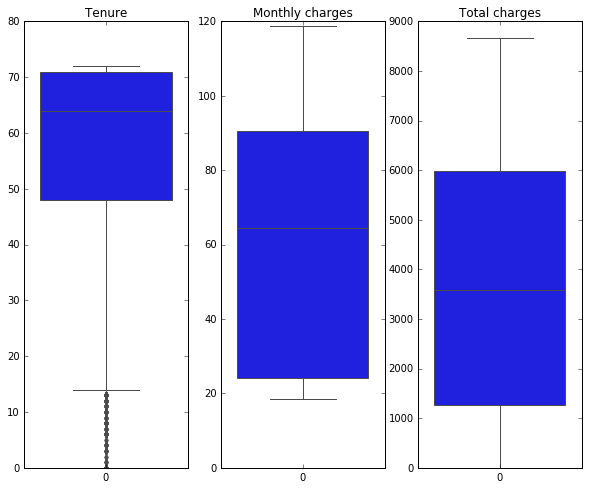

In [11]:
# Create a box plot of each variable in your new dataframe. 
# This should be a single chart with 3 categorical plots, 1 each for tenure, monthly charges, total charges.

plt.figure(figsize=(10,8))

plt.subplot(131)
sns.boxplot(data=telco_df_noID.tenure)
plt.title('Tenure')

plt.subplot(132)
sns.boxplot(data=telco_df_noID.monthly_charges)
plt.title('Monthly charges')

plt.subplot(133)
sns.boxplot(data=telco_df_noID.total_charges)
plt.title('Total charges')







In [12]:
# Split your data into a test and train dataset. 
# Set the random_state to 123. 
# You should end up with 4 dataframes: X_train, X_test, y_train, y_test.

X = telco_df.drop(['customer_id','total_charges'], axis=1)
y = telco_df[['total_charges']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=123)

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [13]:
# Using the in-sample data (X_train and y_train)

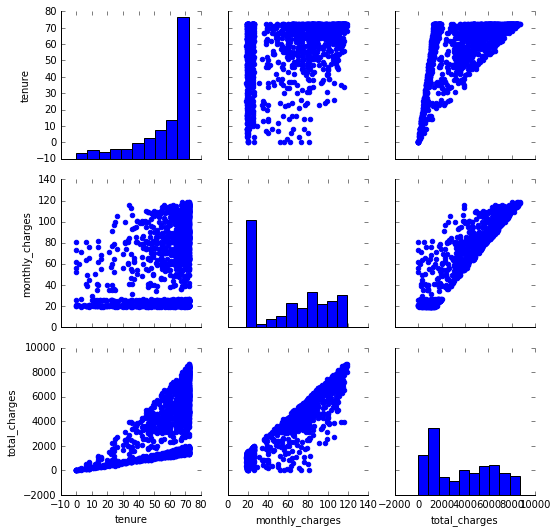

In [14]:
# Create a scatterplot for each combination of variables.

g = sns.PairGrid(train)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)



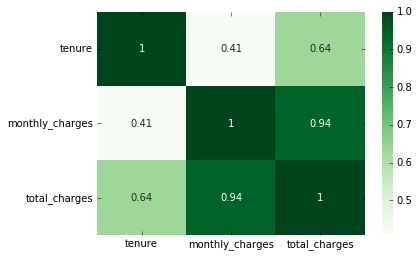

In [15]:
# Create a heatmap containing the 3 variables.

sns.heatmap(train.corr(), cmap='Greens', annot=True)


In [20]:
# Compute pearson's correlation coefficient and print it's value in the sentence...
# "Pearson's R is ____ with a significance p-value of ____"

pearsons_r = [[column, pearsonr(train[column], train.total_charges)] for column in X_train]
pearsons_r


[['tenure', (0.6350021065102249, 5.692136817600413e-154)],
 ['monthly_charges', (0.9417149491320433, 0.0)]]

In [105]:
# Train (aka fit) a linear regression model, modeling total charges as a linear function of tenure.

lm1 = LinearRegression(fit_intercept=False)

lm1.fit(X_train[['tenure']], y_train)
print(lm1)

lm1_y_intercept = lm1.intercept_
print(lm1_y_intercept)

lm1_coefficients = lm1.coef_
print(lm1_coefficients)



LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)
0.0
[[67.81557644]]


In [75]:
# What is the y-intercept of the regression line? 
# Translate the intercept in plain english, i.e. what is means in the context of the data.

print('y-intercept (b): %.2f' % lm1_y_intercept)


# y-intercept is where the line crosses the y-axsis and 
# represents how much total charges a customer with 0 tenure would have.
# Since they would have $0 charges with 0 tenure I set it to 0.


y-intercept (b): 0.00


In [76]:
# What the slope of the regression line? 
# Translate the slope in plain english, i.e. what is means in the context of the data.


print('coefficient (m): %.2f' % lm1_coefficients[0])

# The slope is 67.82 and means that every month the total charges goes up by that amount.


coefficient (m): 67.82


In [37]:
# Write the linear function in the form of y = m x + b 
# using the parameters that were estimated from the algorithm and 
# the variable names for y and x specific to your data.

print('total_charges = tenure * %.2f' % lm1_coefficients[0])


total_charges = tenure * 67.82


In [89]:
# Test your model on the training sample. 
# That is, use your newly fit model to predict the total charges using tenure.

y_pred_lm1 = lm1.predict(X_train[['tenure']])
y_pred_lm1


array([[4475.82804516],
       [4814.90592737],
       [4068.93458651],
       ...,
       [4747.09035093],
       [4814.90592737],
       [2712.62305767]])

In [51]:
# Evaluate the model's performance using r-squared, mean squared error, and median absolute error.

r2_lm1 = r2_score(y_train, y_pred_lm1)
print('r^2: {:.2%}'.format(r2_lm1))

mse_lm1 = mean_squared_error(y_train, y_pred_lm1)
print("mse: {:.3}".format(mse_lm1)) 

mae_lm1 = median_absolute_error(y_train, y_pred_lm1)
print("mae: {:.3}".format(mae_lm1)) 


r^2: 37.46%
mse: 4.21e+06
mae: 1.73e+03


In [ ]:
# Using the out-of-sample data (X_test, y_test)

In [81]:
# Test your model on the test sample.

y_pred_lm1_test = lm1.predict(X_test[['tenure']])
y_pred_lm1_test



array([[ 678.15576442],
       [4272.38131584],
       [4747.09035093],
       [4272.38131584],
       [4814.90592737],
       [4543.6436216 ],
       [4136.75016295],
       [4475.82804516],
       [4882.72150381],
       [2034.46729326],
       [4543.6436216 ],
       [4068.93458651],
       [4814.90592737],
       [2170.09844614],
       [3526.40997498],
       [ 813.7869173 ],
       [3933.30343363],
       [4408.01246872],
       [4068.93458651],
       [4882.72150381],
       [4543.6436216 ],
       [4882.72150381],
       [4814.90592737],
       [2441.36075191],
       [2983.88536344],
       [4475.82804516],
       [3322.96324565],
       [4611.45919805],
       [4882.72150381],
       [1627.5738346 ],
       [1831.02056393],
       [3526.40997498],
       [3526.40997498],
       [4882.72150381],
       [4882.72150381],
       [ 271.26230577],
       [4882.72150381],
       [4068.93458651],
       [4136.75016295],
       [4882.72150381],
       [ 881.60249374],
       [4747.090

In [127]:
# Evaluate your model's performance on test sample. 
# How do each of the metrics compare to that of the training sample? 
# How can you explain the reason for the difference?

r2_lm1 = r2_score(y_test, y_pred_lm1_test)
print('r^2: {:.2%}'.format(r2_lm1))

mse_lm1 = mean_squared_error(y_test, y_pred_lm1_test)
print("mse: {:.3}".format(mse_lm1)) 

mae_lm1 = median_absolute_error(y_test, y_pred_lm1_test)
print("mae: {:.3}".format(mae_lm1)) 



r^2: 38.34%
mse: 3.88e+06
mae: 1.59e+03


In [134]:
# Calculate the p-value of the regressor for the train and test sample. 
# Hint: f_regression

f_regression(X_test[['tenure']], y_test)



/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([231.6718391]), array([3.48651193e-40]))

Text(0.5, 1.0, 'Predicted vs Actual Total Charges')

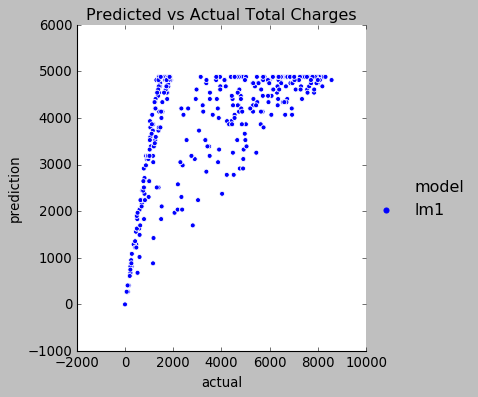

In [160]:
# Create a scatter plot of the predicted values 
# versus the actual values in the test sample.

pd.DataFrame({'actual': y_test.total_charges,
              'lm1': y_pred_lm1_test.ravel()})\
    .melt(id_vars=['actual'], var_name='model', value_name='prediction')\
    .pipe((sns.relplot, 'data'), x='actual', y='prediction', hue='model')


plt.title('Predicted vs Actual Total Charges')






Text(0.5, 1.0, 'actual tenure vs total charge')

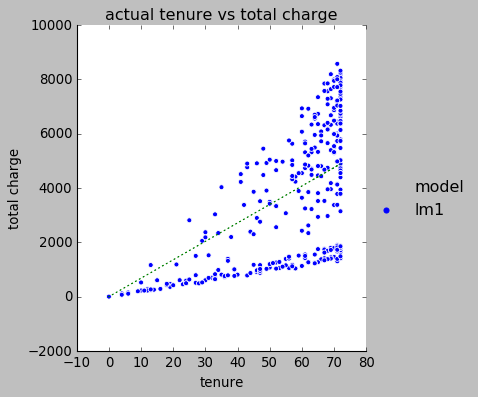

In [195]:
# Create a scatter plot of the actual values of x and y in the test sample 
# with the regression line layered over.

pd.DataFrame({'tenure': test.tenure,
              'lm1': test.total_charges.ravel()})\
    .melt(id_vars=['tenure'], var_name='model', value_name='total charge')\
    .pipe((sns.relplot, 'data'), x='tenure', y='total charge', hue='model')


x = list(range(1,telco_df.tenure.max()))
y = [i * lm1_coefficients for i in x]

x = telco_df.tenure
y = y_test.total_charges
m = 67.82
b = 0

plt.plot(x, b + m * x, ':',c='g')



plt.title('actual tenure vs total charge')








Text(0, 0.5, 'Residuals')

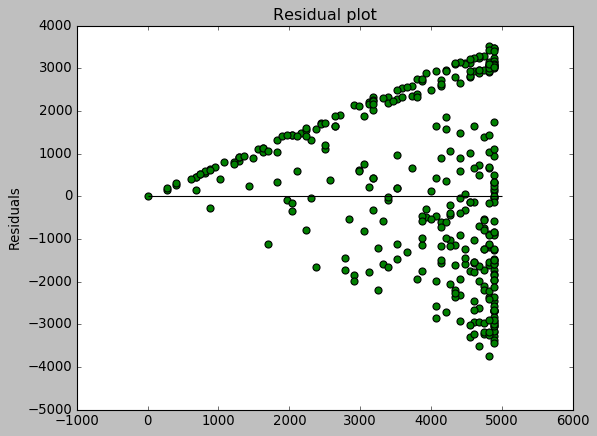

In [199]:
# Create a scatter plot of the residuals 
# (x axis: predicted values of final grade, y axis: the residual values 
# (remember definition of residual from previous lesson). 
# Layer over it a horizonal line that represents no residual.

plt.scatter(y_pred_lm1_test, y_pred_lm1_test - y_test, c='g', s=40)
plt.hlines(y=0, xmin=0, xmax=5000)
plt.title("Residual plot")
plt.ylabel('Residuals')



